In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes

In [4]:
df.head()
dfrg = pd.get_dummies(df['region']).iloc[:,1:]

In [5]:
df[dfrg.columns] = dfrg

In [6]:
Y = df['charges']
df.drop(columns=['charges'], inplace=True)
df.drop(columns=['region'], inplace=True)

In [7]:
df.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int8   
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int8   
 5   northwest  1338 non-null   uint8  
 6   southeast  1338 non-null   uint8  
 7   southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), int8(2), uint8(3)
memory usage: 38.0 KB


In [9]:
df.describe()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.isnull().sum().sum()

0

In [11]:
LRModel = LinearRegression()

In [12]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
Y_scaled = preprocessing.scale(Y)

In [13]:
X_train, X_test , y_train , y_test = train_test_split(df_scaled, Y_scaled,test_size=0.2,random_state=27)

In [14]:
# data standardization
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# applying standardization on numerical features
for i in range(len(X_train_stand[0])):
    
    # fit on training data column
    scale = StandardScaler()
    scale.fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

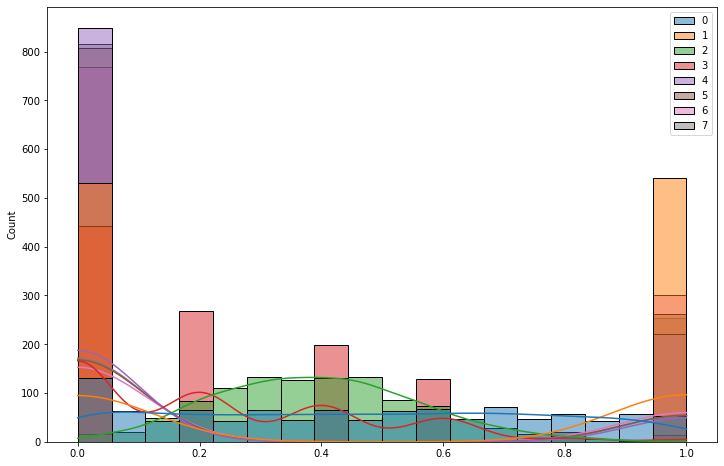

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(X_train_stand, kde=True)
plt.show()

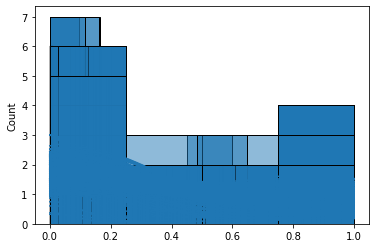

In [17]:
for i in range(len(X_test_stand)):
    sns.histplot(X_test_stand[i], kde=True)

In [18]:
LRModel.fit(X_train_stand, y_train)

LinearRegression()

In [19]:
y_pred = LRModel.predict(X_test_stand)

In [20]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
df2.head(10)

,Actual,Predicted
0,-0.026463,0.228149
1,1.952849,0.120521
2,-0.777554,-0.583982
3,-0.860353,-0.653404
4,-0.534548,-0.493715
5,-0.728675,-0.550461
6,-0.932097,-0.647476
7,2.579903,1.784328
8,-0.922417,-0.886643
9,-0.416157,-0.368582


In [36]:
print(LRModel.score(X_train_stand, y_train))
print(LRModel.score(X_test_stand, y_test))

0.7552596047203377
0.7318952597046908


In [22]:
#Lets look at the coefficients, intercept and the Error.

print('The coefficients of our Linear Reg model are : {}'.format(LRModel.coef_))
print('The intercept of our Linear Reg model is : {}'.format(LRModel.intercept_))
print('The MSE for our model is : {}'.format(mean_squared_error(y_test, y_pred)))

The coefficients of our Linear Reg model are : [ 0.9471283  -0.01887503  1.02324749  0.15564776  1.9815715  -0.01216576
 -0.05659726 -0.06119481]
The intercept of our Linear Reg model is : -1.2433662438777335
The MSE for our model is : 0.2693016272272509


Text(0, 0.5, 'Charges (INR)')

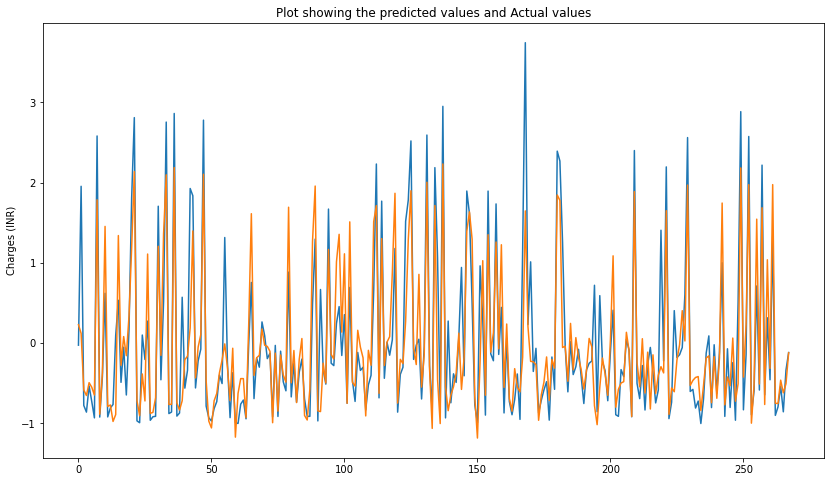

In [23]:
plt.figure(figsize=(14,8))
plt.plot(df2['Actual'])
plt.plot(df2['Predicted'])
plt.title("Plot showing the predicted values and Actual values")
plt.ylabel("Charges (INR)")

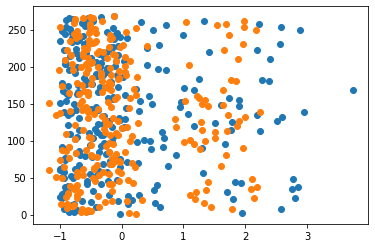

In [24]:
plt.scatter(df2['Actual'], np.arange(1,int(len(df2)+1)))
plt.scatter(df2['Predicted'], np.arange(1,int(len(df2)+1)))

Here we see that after value 20000 on axis X , our values are mostly shifted or we can say that the model is not a good fit to our data. We can also say the same by looking at our Mean Squared Error, Its huge. So, Now lets use regularisation in order to best fit our model. 

In [55]:
my_max = -float('inf')
j = 0

for i in range(100):
    ridge = Ridge(alpha = j)
    ridge.fit(X_train,y_train)
    scr = ridge.score(X_train, y_train)
    
    if scr>my_max:
        my_max = scr
    print(scr)
    
    j *= 2
    
print(my_max)

0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898451503
0.3411529898

In [47]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7552596046531629
0.731895235181032


In [28]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7250161201416804
0.692076884722122


In [29]:
ridge_pred = ridge.predict(X_test)
df2_ridge = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : ridge_pred.flatten()})

lasso_pred = lasso.predict(X_test)
df2_lasso = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : lasso_pred.flatten()})

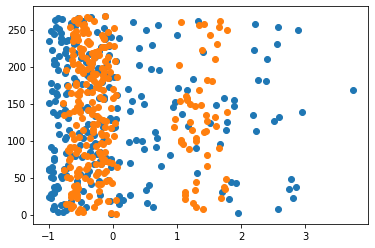

In [30]:
plt.scatter(df2_lasso['Actual'], np.arange(1,int(len(df2_lasso)+1)))
plt.scatter(df2_lasso['Predicted'], np.arange(1,int(len(df2_lasso)+1)))

In [31]:
mean_squared_error(y_test , lasso_pred)

0.309297761441586

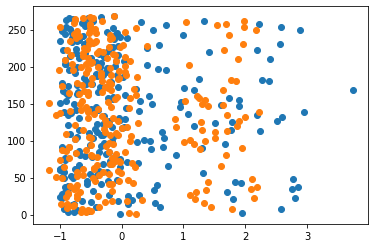

In [32]:
plt.scatter(df2_ridge['Actual'], np.arange(1,int(len(df2_ridge)+1)))
plt.scatter(df2_ridge['Predicted'], np.arange(1,int(len(df2_ridge)+1)))

In [33]:
mean_squared_error(y_test , ridge_pred)

0.26930242123153286

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=5,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:206])

DecisionTreeRegressor Train Score is :  0.4945663764742876
DecisionTreeRegressor Test Score is :  0.465848160381813
----------------------------------------------------
Predicted Value for DecisionTreeRegressorModel is :  [ 0.07839364  0.24944055 -0.72970406 -0.72970406 -0.55104724 -0.55104724
 -0.72970406  2.06515352 -0.93700863 -0.02511947  0.50080839 -0.93700863
 -0.55104724 -0.55104724 -0.55104724  0.50080839 -0.29182725  0.08980984
 -0.5614697   0.24944055  0.35523163  2.80413044 -0.81723612 -0.93700863
 -0.41373735 -0.72970406  0.35523163 -0.93700863 -0.93700863 -0.55104724
  1.77999507 -0.29182725  0.50080839  2.80413044 -0.72970406 -0.72970406
  2.80413044 -0.93700863 -0.72970406 -0.71052212 -0.5614697  -0.29182725
  0.24944055  2.21973625 -0.45030887 -0.0760095   0.08980984  2.80413044
 -0.55104724 -0.93700863 -0.93700863 -0.55104724 -0.55104724 -0.30782555
 -0.45030887  0.08980984 -0.0760095  -0.81723612 -0.29182725 -0.93700863
 -0.81723612 -0.55104724 -0.71052212 -0.71052212